<a href="https://colab.research.google.com/github/glaucio-rocha/ciencia_de_dados/blob/main/MVP_Sprint_I_Glaucio_Rocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas (Sprint 1)
## Ciência de Dados & Analytics
### Glaucio A. Rocha
### 2023-12-11
---

## 1. Introdução

### 1.1 Definição do Problema

O problema endereçado neste MVP é a análise de dados de consumo de energia elétrica de uma residência. O objetivo é identificar padrões de consumo para, futuramente, criar um modelo de previsão de consumo de energia elétrica.

O dataset utilizado é o [Individual household electric power consumption Data Set](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption) disponível no repositório de datasets da UCI.

O dataset contém 2.075.259 medições coletadas em uma casa localizada em Sceaux (7km de Paris, França) entre dezembro de 2006 e novembro de 2010 (47 meses).

O dataset contém as seguintes colunas

- date: Data no formato dd/mm/yyyy
- time: hora no formato hh:mm:ss
- global_active_power: Energia ativa medida a cada minuto em Kwh
- global_reactive_power: Energia reativa medida a cada minuto em Kwh
- voltage: Tensão elétrica medida a cada minuto (em volt)
- global_intensity: corrente elétrica medida a cada minuto (em ampere)
- sub_metering_1: Medida de energia em watt-hora relacionada a lava-louça, a parte elétrica do forno a gás e um microondas (cozinha).
- sub_metering_2: Medida de energia em watt-hora relacionada a lava-roupas, secadora, uma geladeira e uma lâmpada (lavanderia).
- sub_metering_3: Medida de energia em watt-hora relacionada ao aquecedor de água e ar condicionado (climatização).

Importante:
- (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) representa a energia ativa consumida a cada minuto (em watt-hora) no domicílio pelos equipamentos elétricos não medidos nas submedições 1, 2 e 3. Esse consumo não medido deve ser adicionado na análise para auxiliar no entendimento do consumo total de energia elétrica na residência.

O conjunto de dados contém alguns valores ausentes nas medições (quase 1,25% das linhas). Todos as medidas de data/hora do calendário estão presentes no conjunto de dados, mas para algumas medidas de data/hora, os valores de medição estão ausentes: um valor ausente é representado pela ausência de valor entre dois separadores de atributos de ponto e vírgula consecutivos. Por exemplo, o conjunto de dados mostra valores ausentes em 28 de abril de 2007.

### 1.2 Carga de Dados

#### 1.2.1 Configuração de variáveis


In [1]:
DATASET = "https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip"


#### 1.2.2 importação de bibliotecas


In [2]:
!pip install seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 1.2.3 Carga dos dados


In [4]:
# carrega em df um dataframe pandas com os dados do arquivo DATASET
df = pd.read_csv(DATASET, sep=";", low_memory=False)


## 2. Análise de Dados

### 2.1 Estatísticas Descritivas
#### Número de atributos e instâncias

  O dataset possui 2.075.259 instâncias e 9 atributos. Dois atributos são do tipo data e hora e os outros 7 deveriam ser numéricos.

In [5]:
# conta a quantidade de instancias em df e quais os tipos de atributos presentes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
# verifica se existem valores sem dados no dataset
df.isnull().sum()


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
#mostra dataset somente com os nulos de Sub_metering_3
df_nulos = df[df['Sub_metering_3'].isnull()]
df_nulos.head(10)


Date      Time Global_active_power Global_reactive_power  \
6839    21/12/2006  11:23:00                   ?                     ?   
6840    21/12/2006  11:24:00                   ?                     ?   
19724   30/12/2006  10:08:00                   ?                     ?   
19725   30/12/2006  10:09:00                   ?                     ?   
41832    14/1/2007  18:36:00                   ?                     ?   
61909    28/1/2007  17:13:00                   ?                     ?   
98254    22/2/2007  22:58:00                   ?                     ?   
98255    22/2/2007  22:59:00                   ?                     ?   
142588   25/3/2007  17:52:00                   ?                     ?   
190497   28/4/2007  00:21:00                   ?                     ?   

       Voltage Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
6839         ?                ?              ?              ?             NaN  
6840         ?                ?              ?              ?             NaN  
19724        ?                ?              ?              ?             NaN  
19725        ?                ?              ?              ?             NaN  
41832        ?                ?              ?              ?             NaN  
61909        ?                ?              ?              ?             NaN  
98254        ?                ?              ?              ?             NaN  
98255        ?                ?              ?              ?             NaN  
142588       ?                ?              ?              ?             NaN  
190497       ?                ?              ?              ?             NaN

Somente a coluna Sub_metering_3 possui valores ausentes (25979 valores). As outras colunas vieram no arquivo com o caractere '?' substituindo a ausência de valor. Vamos substituir o caractere '?' por NaN e converter as colunas para o tipo numérico.

In [8]:
# substitui os caracteres ? por NaN
df = df.replace('?', np.nan)
# verifica se existem valores sem dados no dataset
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [9]:
# Converte as colunas em numérico exceto 'Date' e "Time"
for col in df.columns:
    if col not in ['Date', 'Time']:
        df[col] = pd.to_numeric(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


#### Valores ausentes e discrepantes
O dataset continua com colunas com valores ausentes. Pela quantidade mínima de linhas com valor nulo, poderíamos remover essas linhas. Entretanto, como os dados são de uma serie temporal, não é prudente remover linhas aleatoriamente. Vamos substituir os valores ausentes por uma interpolação ente os dados anteriores e posteriores, na etapa de pre-processamento dos dados.

Uma avaliação das caracteristicas dos dados não apresentou nenhum consumo negativo, que seria um valor discrepante e inválido.

####  Resumo estatístico dos atributos com valor numérico

In [10]:
# resumo estatístico do campos numéricos do dataset
df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         2.049280e+06           2.049280e+06  2.049280e+06   
mean          1.091615e+00           1.237145e-01  2.408399e+02   
std           1.057294e+00           1.127220e-01  3.239987e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410100e+02   
75%           1.528000e+00           1.940000e-01  2.428900e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
count      2.049280e+06    2.049280e+06    2.049280e+06    2.049280e+06  
mean       4.627759e+00    1.121923e+00    1.298520e+00    6.458447e+00  
std        4.444396e+00    6.153031e+00    5.822026e+00    8.437154e+00  
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00  
25%        1.400000e+00    0.000000e+00    0.000000e+00    0.000000e+00  
50%        2.600000e+00    0.000000e+00    0.000000e+00    1.000000e+00  
75%        6.400000e+00    0.000000e+00    1.000000e+00    1.700000e+01  
max        4.840000e+01    8.800000e+01    8.000000e+01    3.100000e+01

In [11]:
# verifica correlação excluindo as colunas Date e Time
df.drop(['Date', 'Time'], axis=1).corr(method='pearson')


Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.247017 -0.399762   
Global_reactive_power             0.247017               1.000000 -0.112246   
Voltage                          -0.399762              -0.112246  1.000000   
Global_intensity                  0.998889               0.266120 -0.411363   
Sub_metering_1                    0.484401               0.123111 -0.195976   
Sub_metering_2                    0.434569               0.139231 -0.167405   
Sub_metering_3                    0.638555               0.089617 -0.268172   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998889        0.484401        0.434569   
Global_reactive_power          0.266120        0.123111        0.139231   
Voltage                       -0.411363       -0.195976       -0.167405   
Global_intensity               1.000000        0.489298        0.440347   
Sub_metering_1                 0.489298        1.000000        0.054721   
Sub_metering_2                 0.440347        0.054721        1.000000   
Sub_metering_3                 0.626543        0.102571        0.080872   

                       Sub_metering_3  
Global_active_power          0.638555  
Global_reactive_power        0.089617  
Voltage                     -0.268172  
Global_intensity             0.626543  
Sub_metering_1               0.102571  
Sub_metering_2               0.080872  
Sub_metering_3               1.000000

Neste ponto dá para perceber que existe uma correlação entre o consumo de energia(Global_active_power) e a corrente (Global_intensity) e uma correlação inversa entre o consumo e a tensão (Voltage).

Também é possível perceber que a média de consumo é de 1,09 Kwh, com um desvio padrão de 1,05 Kwh. O consumo máximo foi de 11,12 Kwh e o mínimo de 0,076 Kwh.

### 2.2 Visualização dos dados
#### Visualizações unimodais
##### Histogramas

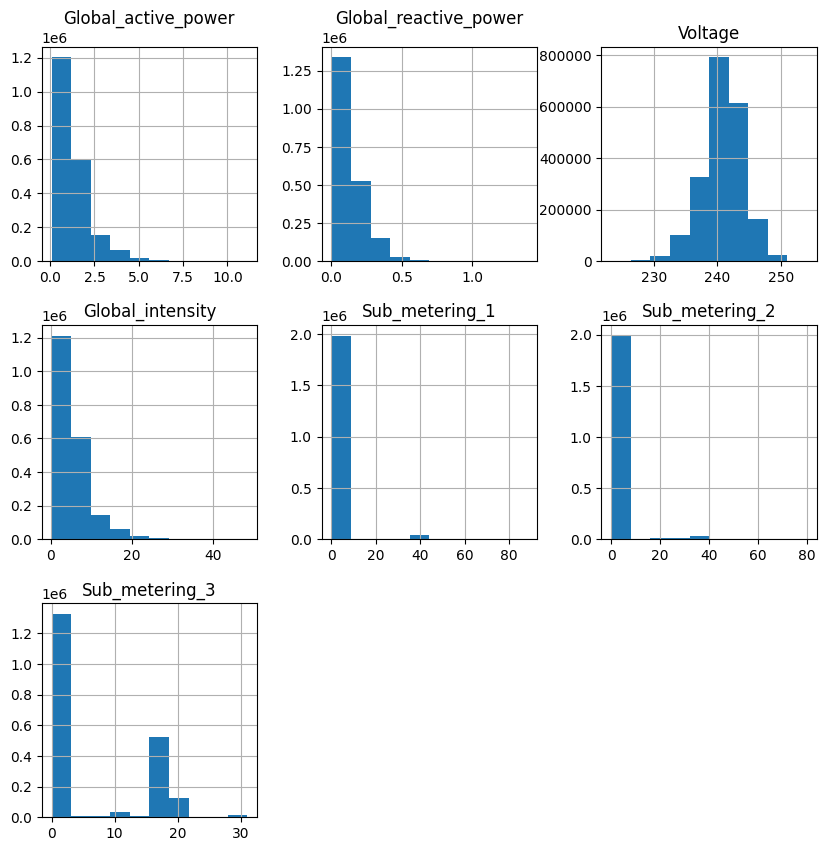

In [12]:
df.drop(['Date', 'Time'], axis=1).hist(figsize=(10, 10));

##### Density Plots

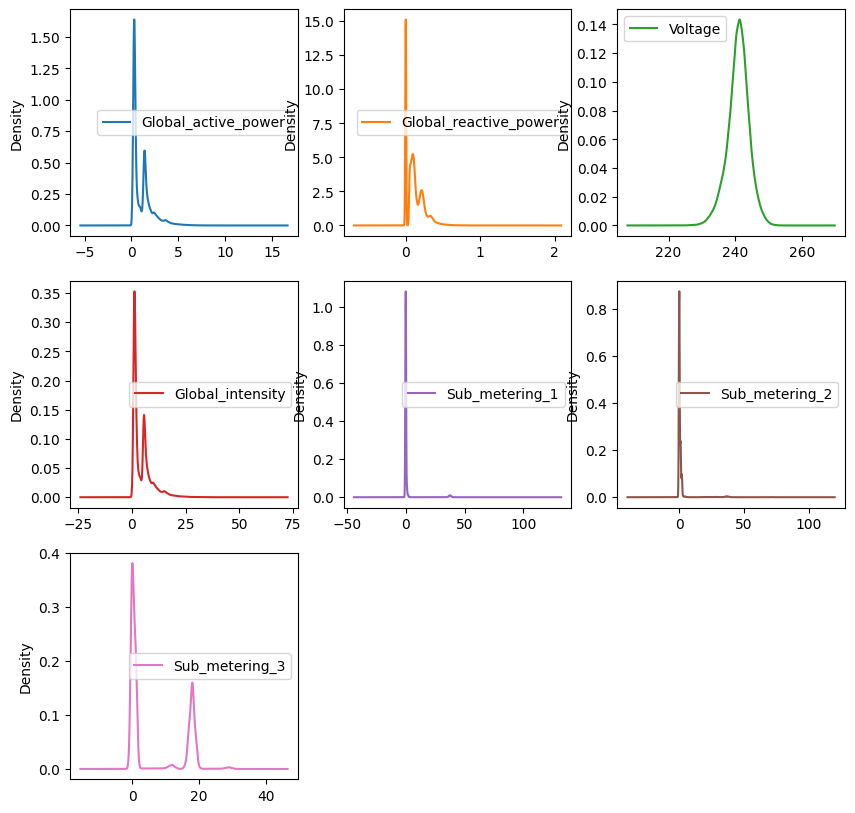

In [13]:
# Density plots
from matplotlib import pyplot as plt


df.drop(['Date', 'Time'], axis=1).plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 10))
plt.show();

##### Boxplot

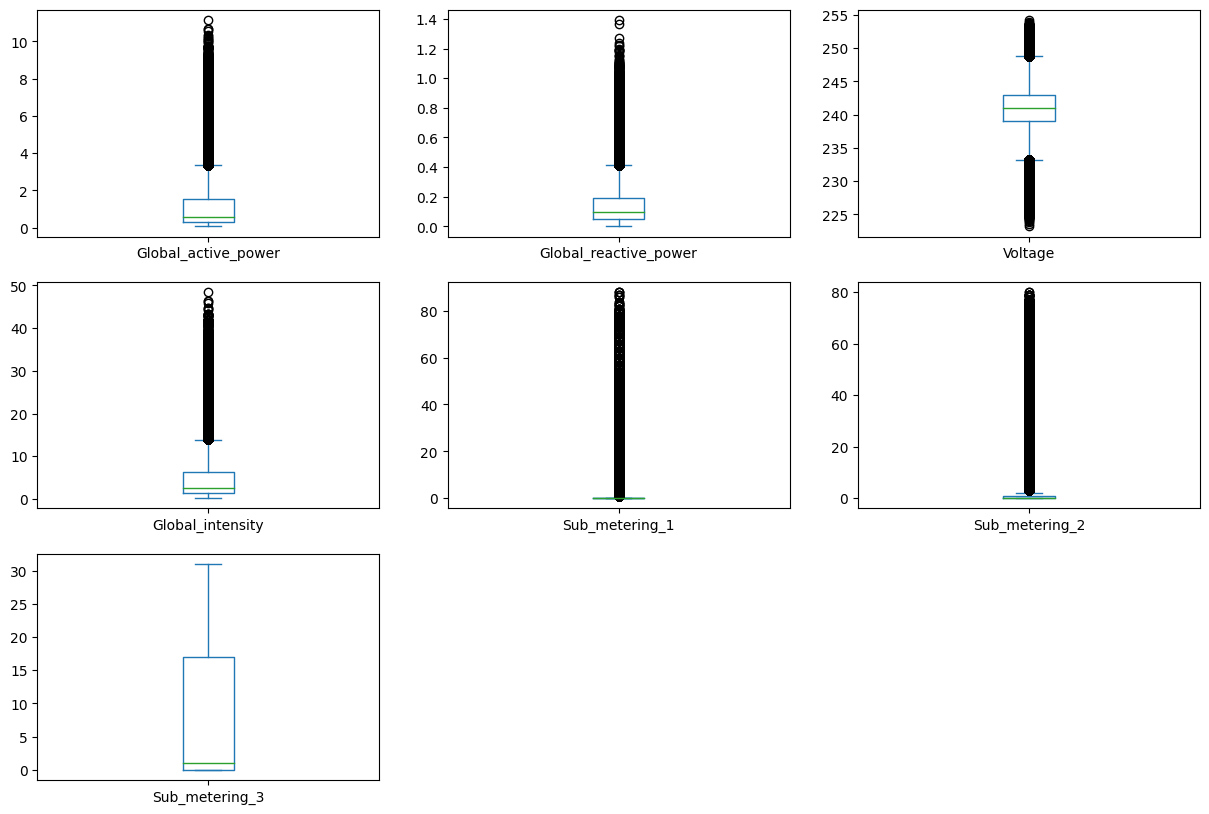

In [14]:
# Box and Whisker Plots
df.drop(['Date', 'Time'], axis=1).plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False,
                                        figsize=(15, 10));

Aqui dá pra perceber pelos outliers que alguns circuitos com medidores são usados esporadicamente e quando são usados tem valores de consumo elevados.

#### Visualizações Multimodais
##### Matriz de Correlação

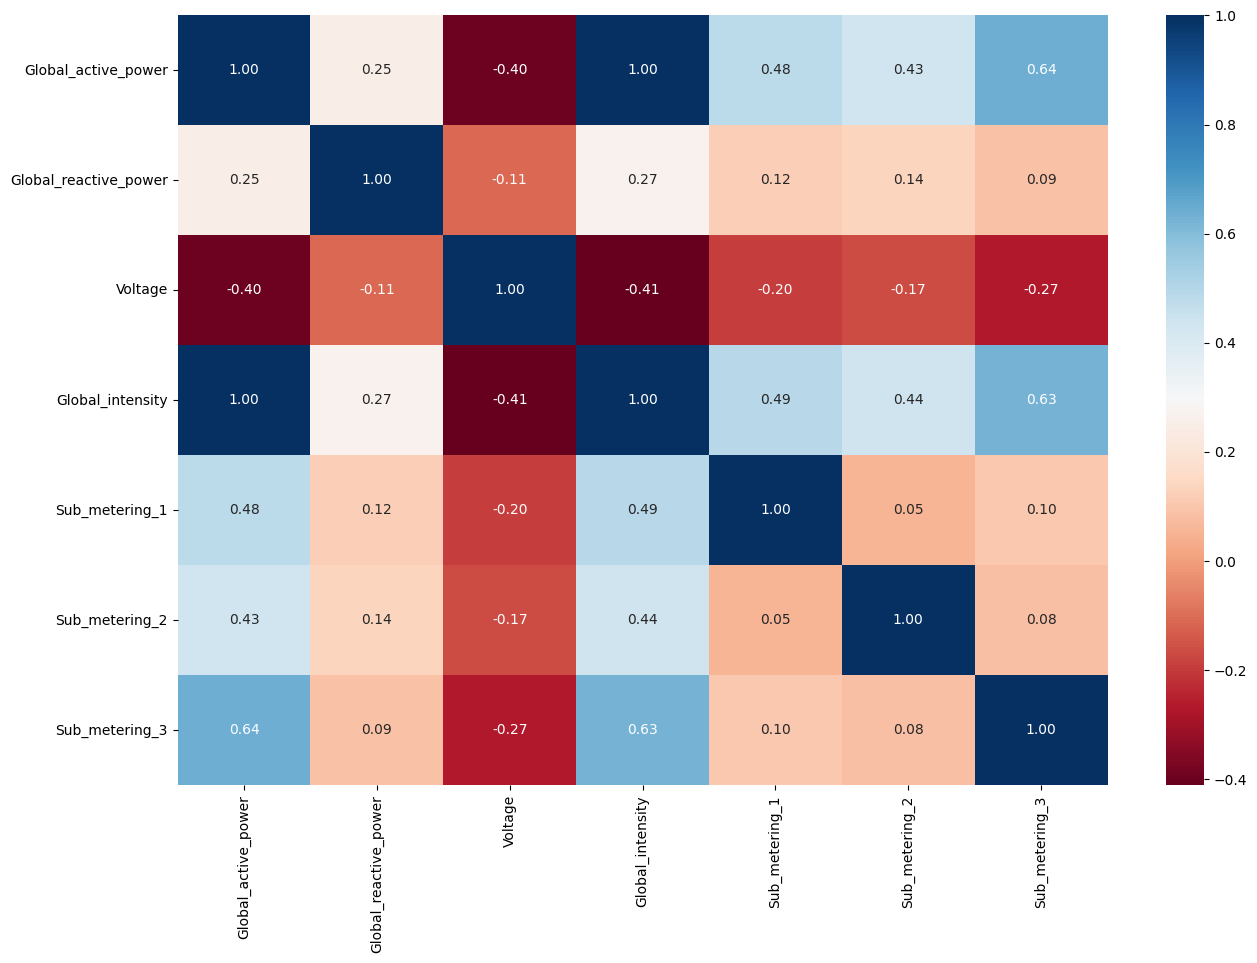

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(['Date', 'Time'], axis=1).corr(), cmap="RdBu",annot=True, fmt=".2f");

#### Considerações sobre as visualizações


Neste ponto podemos entender alguns comportamentos importantes:
- A tensão se comporta como uma distribuição normal. o que podia ser esperado, já que a tensão é regulada e, provavelmente, controlada pela distribuidora de energia.
- O Comportamento do consumo de energia é bimodal, com um pico em um pouco acima do 0 Kwh e outro em torno de 1,5 Kwh. Isso pode ser explicado pelo fato de que a residência possui equipamentos de alta potência (ar condicionado, aquecedor de água, etc), que são usados esporadicamente, e equipamentos de baixa potência (lâmpadas, microondas, etc) que são usados com mais frequência.
- Sub_metering_3 possui um pico de uso em torno de 0,5 Kwh, e outro próximo do 20 Kwh. Isso pode ser explicado pelo fato de que o aquecedor de água e o ar condicionado são equipamentos de alta potência e são mais usados em determinados períodos do ano.
- Sub_metering_3 possui uma maior correlação com o Consumo que Sub_metering_1 e Sub_metering_2. Isso pode ser explicado pelo fato de que o aquecedor de água e o ar condicionado contribuirem mais para o consumo.



Essas observações sugerem a necessidade de aumentar o dataset criando novas colunas a partir das colunas existentes:
- Uma coluna data, do tipo datetime, derivado dos campos Date e Time
- Hora do dia: hora do dia em que a medição foi feita, extraida da coluna data para pesquisar padrões de consumo ao longo do dia.
- Dia da semana: dia da semana em que a medição foi feita, extraida da coluna data para pesquisar padrões de consumo ao longo da semana.
- Mês: mês em que a medição foi feita, extraida da coluna data para pesquisar padrões de consumo ao longo do ano.
- Estação: estação do ano em que a medição foi feita, extraida da coluna data para pesquisar padrões de consumo ao longo do ano.
- Consumo não medido: consumo de energia elétrica na residência pelos equipamentos elétricos não medidos nas submedições 1, 2 e 3, calculado a partir das colunas Global_active_power, Sub_metering_1, Sub_metering_2 e Sub_metering_3.

Outra ação indicada para o pré-processamento é a modificação dos nomes das colunas para o seu significado completo.

## 3. Pré-processamento de dados

Nesta etapa serão realizadas modificações e operações nos dados para prepará-los para a modelagem.


#### Criação de novas colunas
Para facilitar a análise, as colunas Date+Time serão convertidas para o tipo datetime.

In [ ]:
# separa as colunas date e time do datraframe df em um dataframe temporario
df_temp = df[['Date', 'Time']]

# transforma as colunas date e time do dataframe temporario em uma unica coluna usando .loc
df_temp.loc[:, 'Date'] = df_temp.loc[:, 'Date'] + ' ' + df_temp.loc[:, 'Time']
# df_temp['Date'] = df_temp['Date'] + ' ' + df_temp['Time']
# converte a coluna date para o formato datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%d/%m/%Y %H:%M:%S')

#df_temp.loc[:, 'Date'] = pd.to_datetime(df_temp.loc[:, 'Date'], format='%d/%m/%Y %H:%M:%S')

# exclui a coluna time do dataframe temporario
df_temp = df_temp.drop(['Time'], axis=1)
# exclui de df as colunas dat e time
df = df.drop(['Date', 'Time'], axis=1)


/tmp/ipykernel_8483/2866219479.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%d/%m/%Y %H:%M:%S')


In [ ]:
df.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0            17.0  
1             0.0             1.0            16.0  
2             0.0             2.0            17.0  
3             0.0             1.0            17.0  
4             0.0             1.0            17.0

Serão criadas novas colunas para ajudar no reconhecimento de padrões de consumo

In [ ]:
#concatena df_temp com df
df = pd.concat([df_temp, df], axis=1)

# cria coluna com as estações do ano a partir de Date usando as classes 'Winter', 'Spring', 'Summer', 'Autumn'
df['Season'] = pd.cut(df['Date'].dt.month, bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Autumn'])

# cria coluna com o dia da semana a partir de Date
df['Weekday'] = df['Date'].dt.dayofweek

#cria coluna com a hora a partir de Date
df['Hour'] = df['Date'].dt.hour

# Cria coluna com as classes 'Night', 'Morning', 'Afternoon', 'Evening' a partir de Date
df['Daytime'] = pd.cut(df['Date'].dt.hour, bins=[-1, 6, 12, 18, 23], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

df.head()


Date  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Season  \
0              18.4             0.0             1.0            17.0  Autumn   
1              23.0             0.0             1.0            16.0  Autumn   
2              23.0             0.0             2.0            17.0  Autumn   
3              23.0             0.0             1.0            17.0  Autumn   
4              15.8             0.0             1.0            17.0  Autumn   

   Weekday  Hour    Daytime  
0        5    17  Afternoon  
1        5    17  Afternoon  
2        5    17  Afternoon  
3        5    17  Afternoon  
4        5    17  Afternoon

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
 8   Season                 category      
 9   Weekday                int32         
 10  Hour                   int32         
 11  Daytime                category      
dtypes: category(2), datetime64[ns](1), float64(7), int32(2)
memory usage: 146.5 MB


In [ ]:
df.isna().sum()

Date                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Season                       0
Weekday                      0
Hour                         0
Daytime                      0
dtype: int64

#### Interpolação dos valores ausentes


In [ ]:

# interpola os valores nulos de Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3
df['Global_active_power'] = df['Global_active_power'].interpolate(method='linear', limit_direction='both')
df['Global_reactive_power'] = df['Global_reactive_power'].interpolate(method='linear', limit_direction='both')
df['Voltage'] = df['Voltage'].interpolate(method='linear', limit_direction='both')
df['Global_intensity'] = df['Global_intensity'].interpolate(method='linear', limit_direction='both')
df['Sub_metering_1'] = df['Sub_metering_1'].interpolate(method='linear', limit_direction='both')
df['Sub_metering_2'] = df['Sub_metering_2'].interpolate(method='linear', limit_direction='both')
df['Sub_metering_3'] = df['Sub_metering_3'].interpolate(method='linear', limit_direction='both')

# cria nova coluna com calculo de energia não medida a partir de Sub_metering_1, Sub_metering_2 e Sub_metering_3 e Global_active_power
df['Unmeasured'] = df['Global_active_power'] * 1000 / 60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']


df.isna().sum()



Date                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Season                   0
Weekday                  0
Hour                     0
Daytime                  0
Unmeasured               0
dtype: int64

#### Preparação de dataset normalizado e padronizado

In [ ]:
# dataset preparado com as colunas numericas Global_active_power, Sub_metering_1, Sub_metering_2, Sub_metering_3, Unmeasured normalizadas
df_norm = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Unmeasured','Voltage', 'Global_intensity']]
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
df_norm.head()

Global_active_power  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0             0.374796             0.0          0.0125        0.548387   
1             0.478363             0.0          0.0125        0.516129   
2             0.479631             0.0          0.0250        0.548387   
3             0.480898             0.0          0.0125        0.548387   
4             0.325005             0.0          0.0125        0.548387   

   Unmeasured   Voltage  Global_intensity  
0    0.429657  0.376090          0.377593  
1    0.587372  0.336995          0.473029  
2    0.573487  0.326010          0.473029  
3    0.583181  0.340549          0.473029  
4    0.357611  0.403231          0.323651

In [ ]:
# dataset preparado com as colunas numericas Global_active_power, Sub_metering_1, Sub_metering_2, Sub_metering_3, Unmeasured padronizadas
df_padr = df[['Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Unmeasured','Voltage', 'Global_intensity']]
df_padr = (df_padr - df_padr.mean()) / df_padr.std()
df_padr.head()


Global_active_power  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0             2.969445       -0.181412       -0.049982        1.254490   
1             4.056248       -0.181412       -0.049982        1.135667   
2             4.069548       -0.181412        0.122830        1.254490   
3             4.082848       -0.181412       -0.049982        1.254490   
4             2.446943       -0.181412       -0.049982        1.254490   

   Unmeasured   Voltage  Global_intensity  
0    4.497598 -1.850903          3.114239  
1    6.599584 -2.224617          4.153938  
2    6.414525 -2.329628          4.153938  
3    6.543717 -2.190643          4.153938  
4    3.537388 -1.591464          2.526584

#### Segunda rodada de visualização dos dados

##### Matriz de Correlação (dataset original)

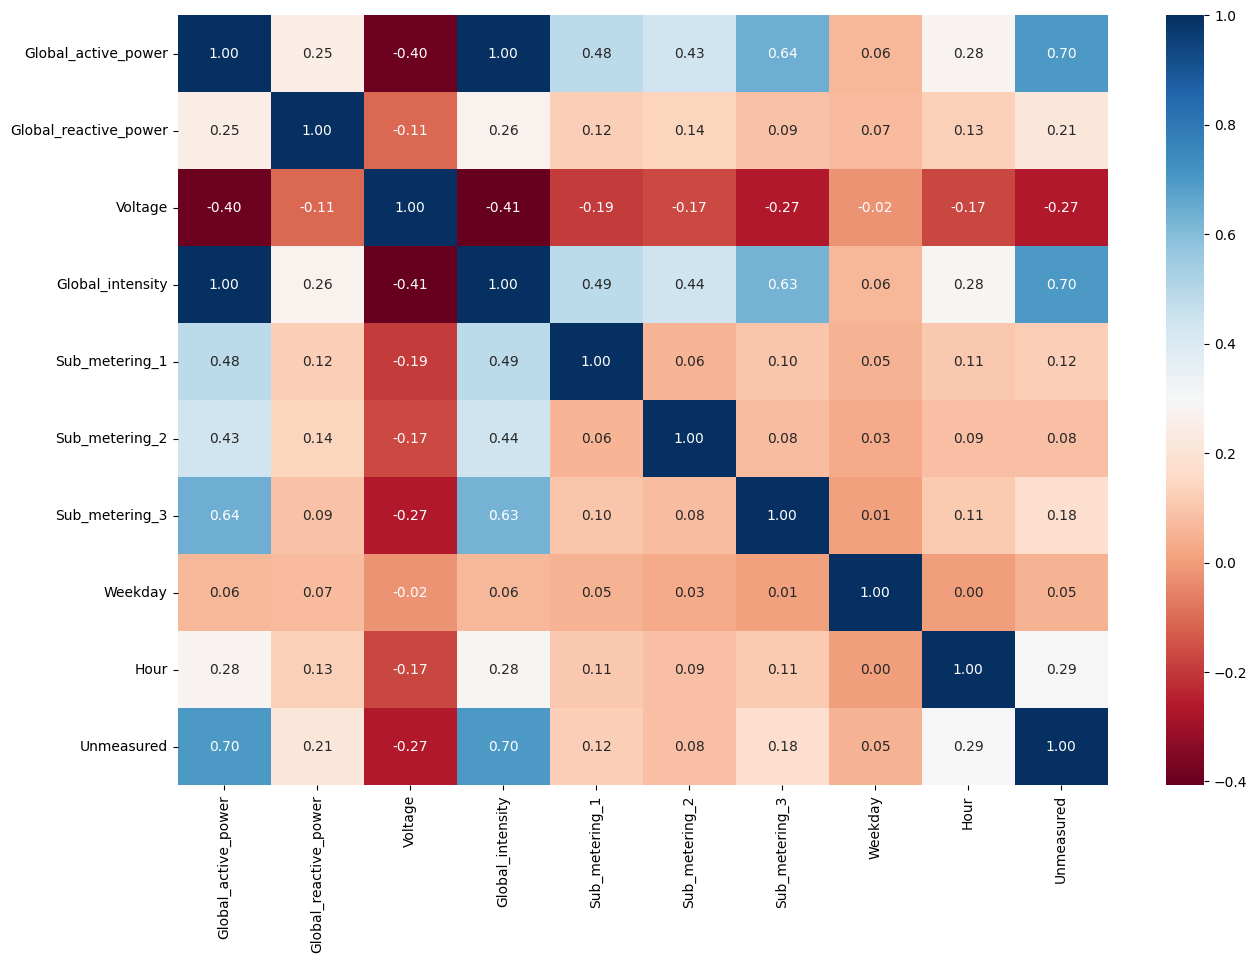

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(['Date', 'Season','Daytime'], axis=1).corr(), cmap="RdBu",annot=True, fmt=".2f");

##### Matriz de Correlação (dataset normalizado)

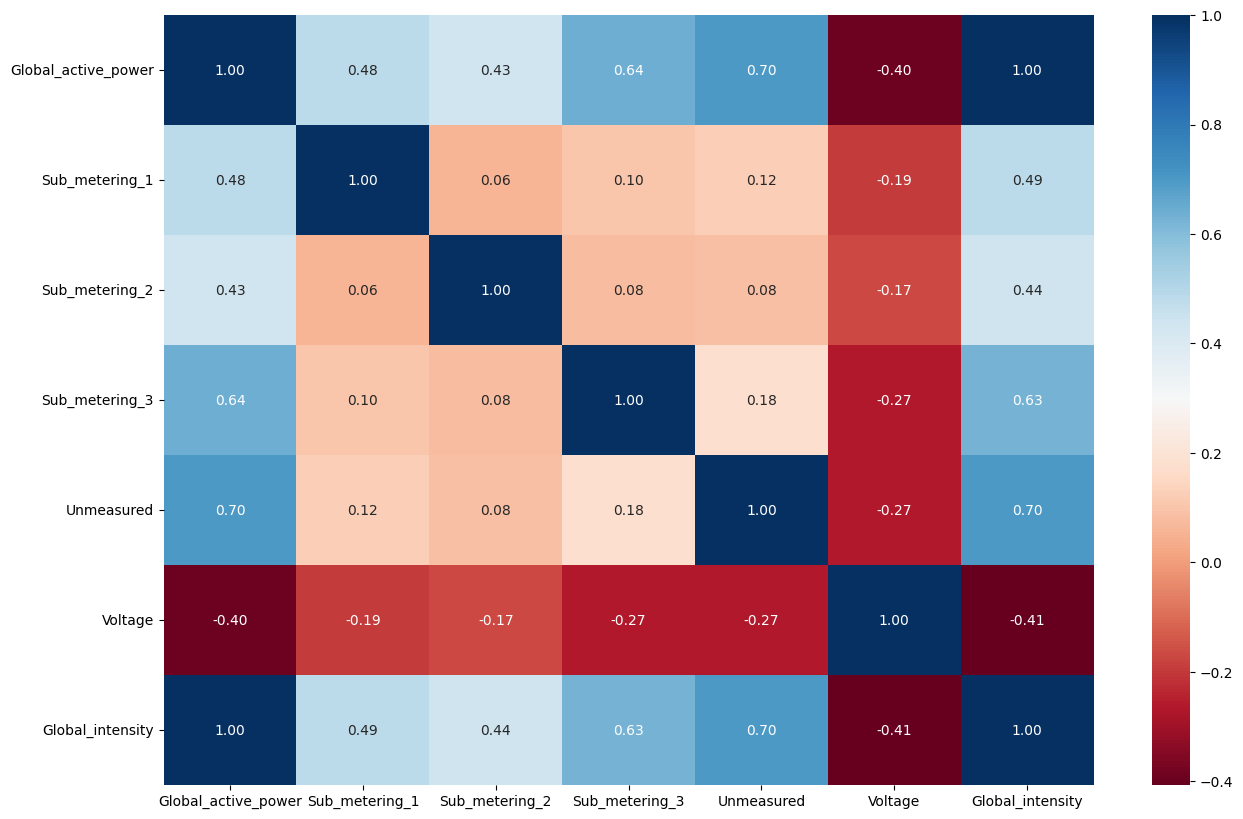

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_norm.corr(), cmap="RdBu",annot=True, fmt=".2f");

##### Matriz de Correlação (dataset padronizado)

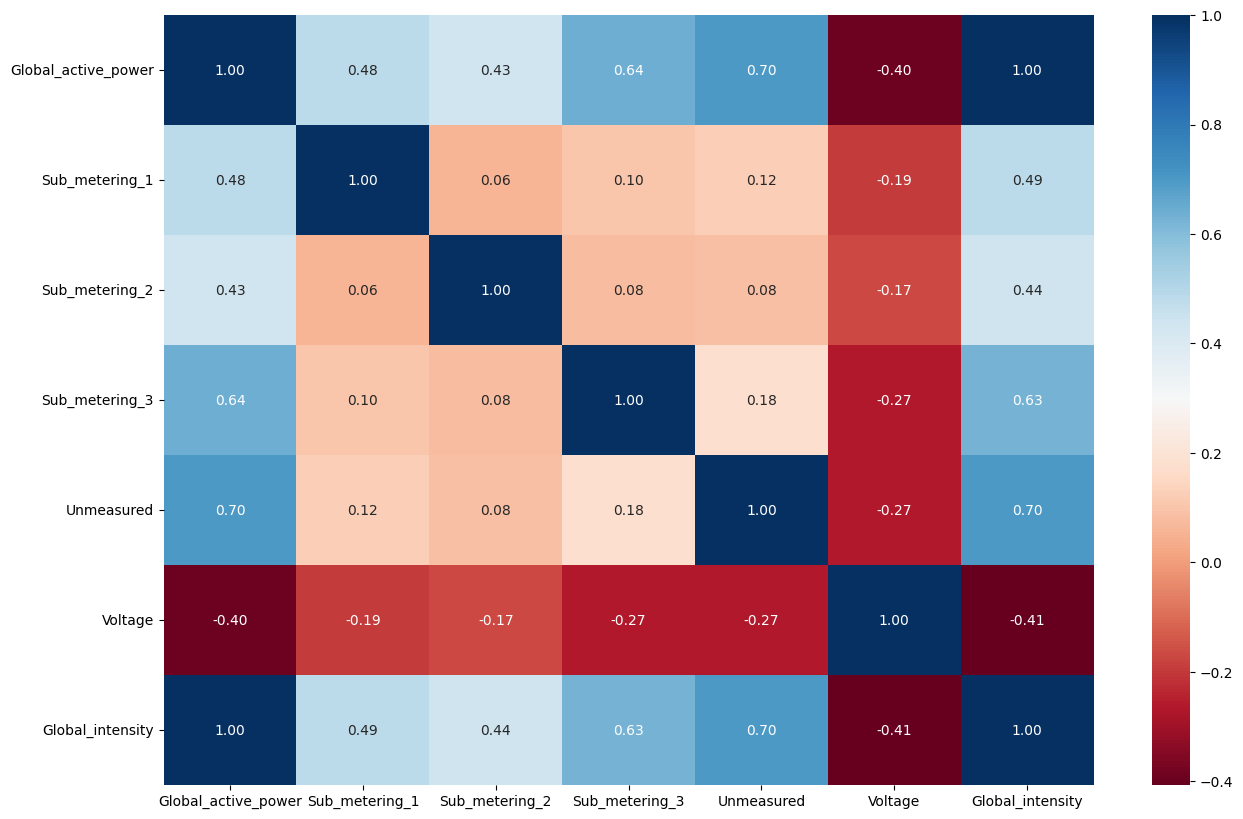

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_padr.corr(), cmap="RdBu",annot=True, fmt=".2f");

#### Pairplots com dataset original (destacando estações do ano e horário do dia)

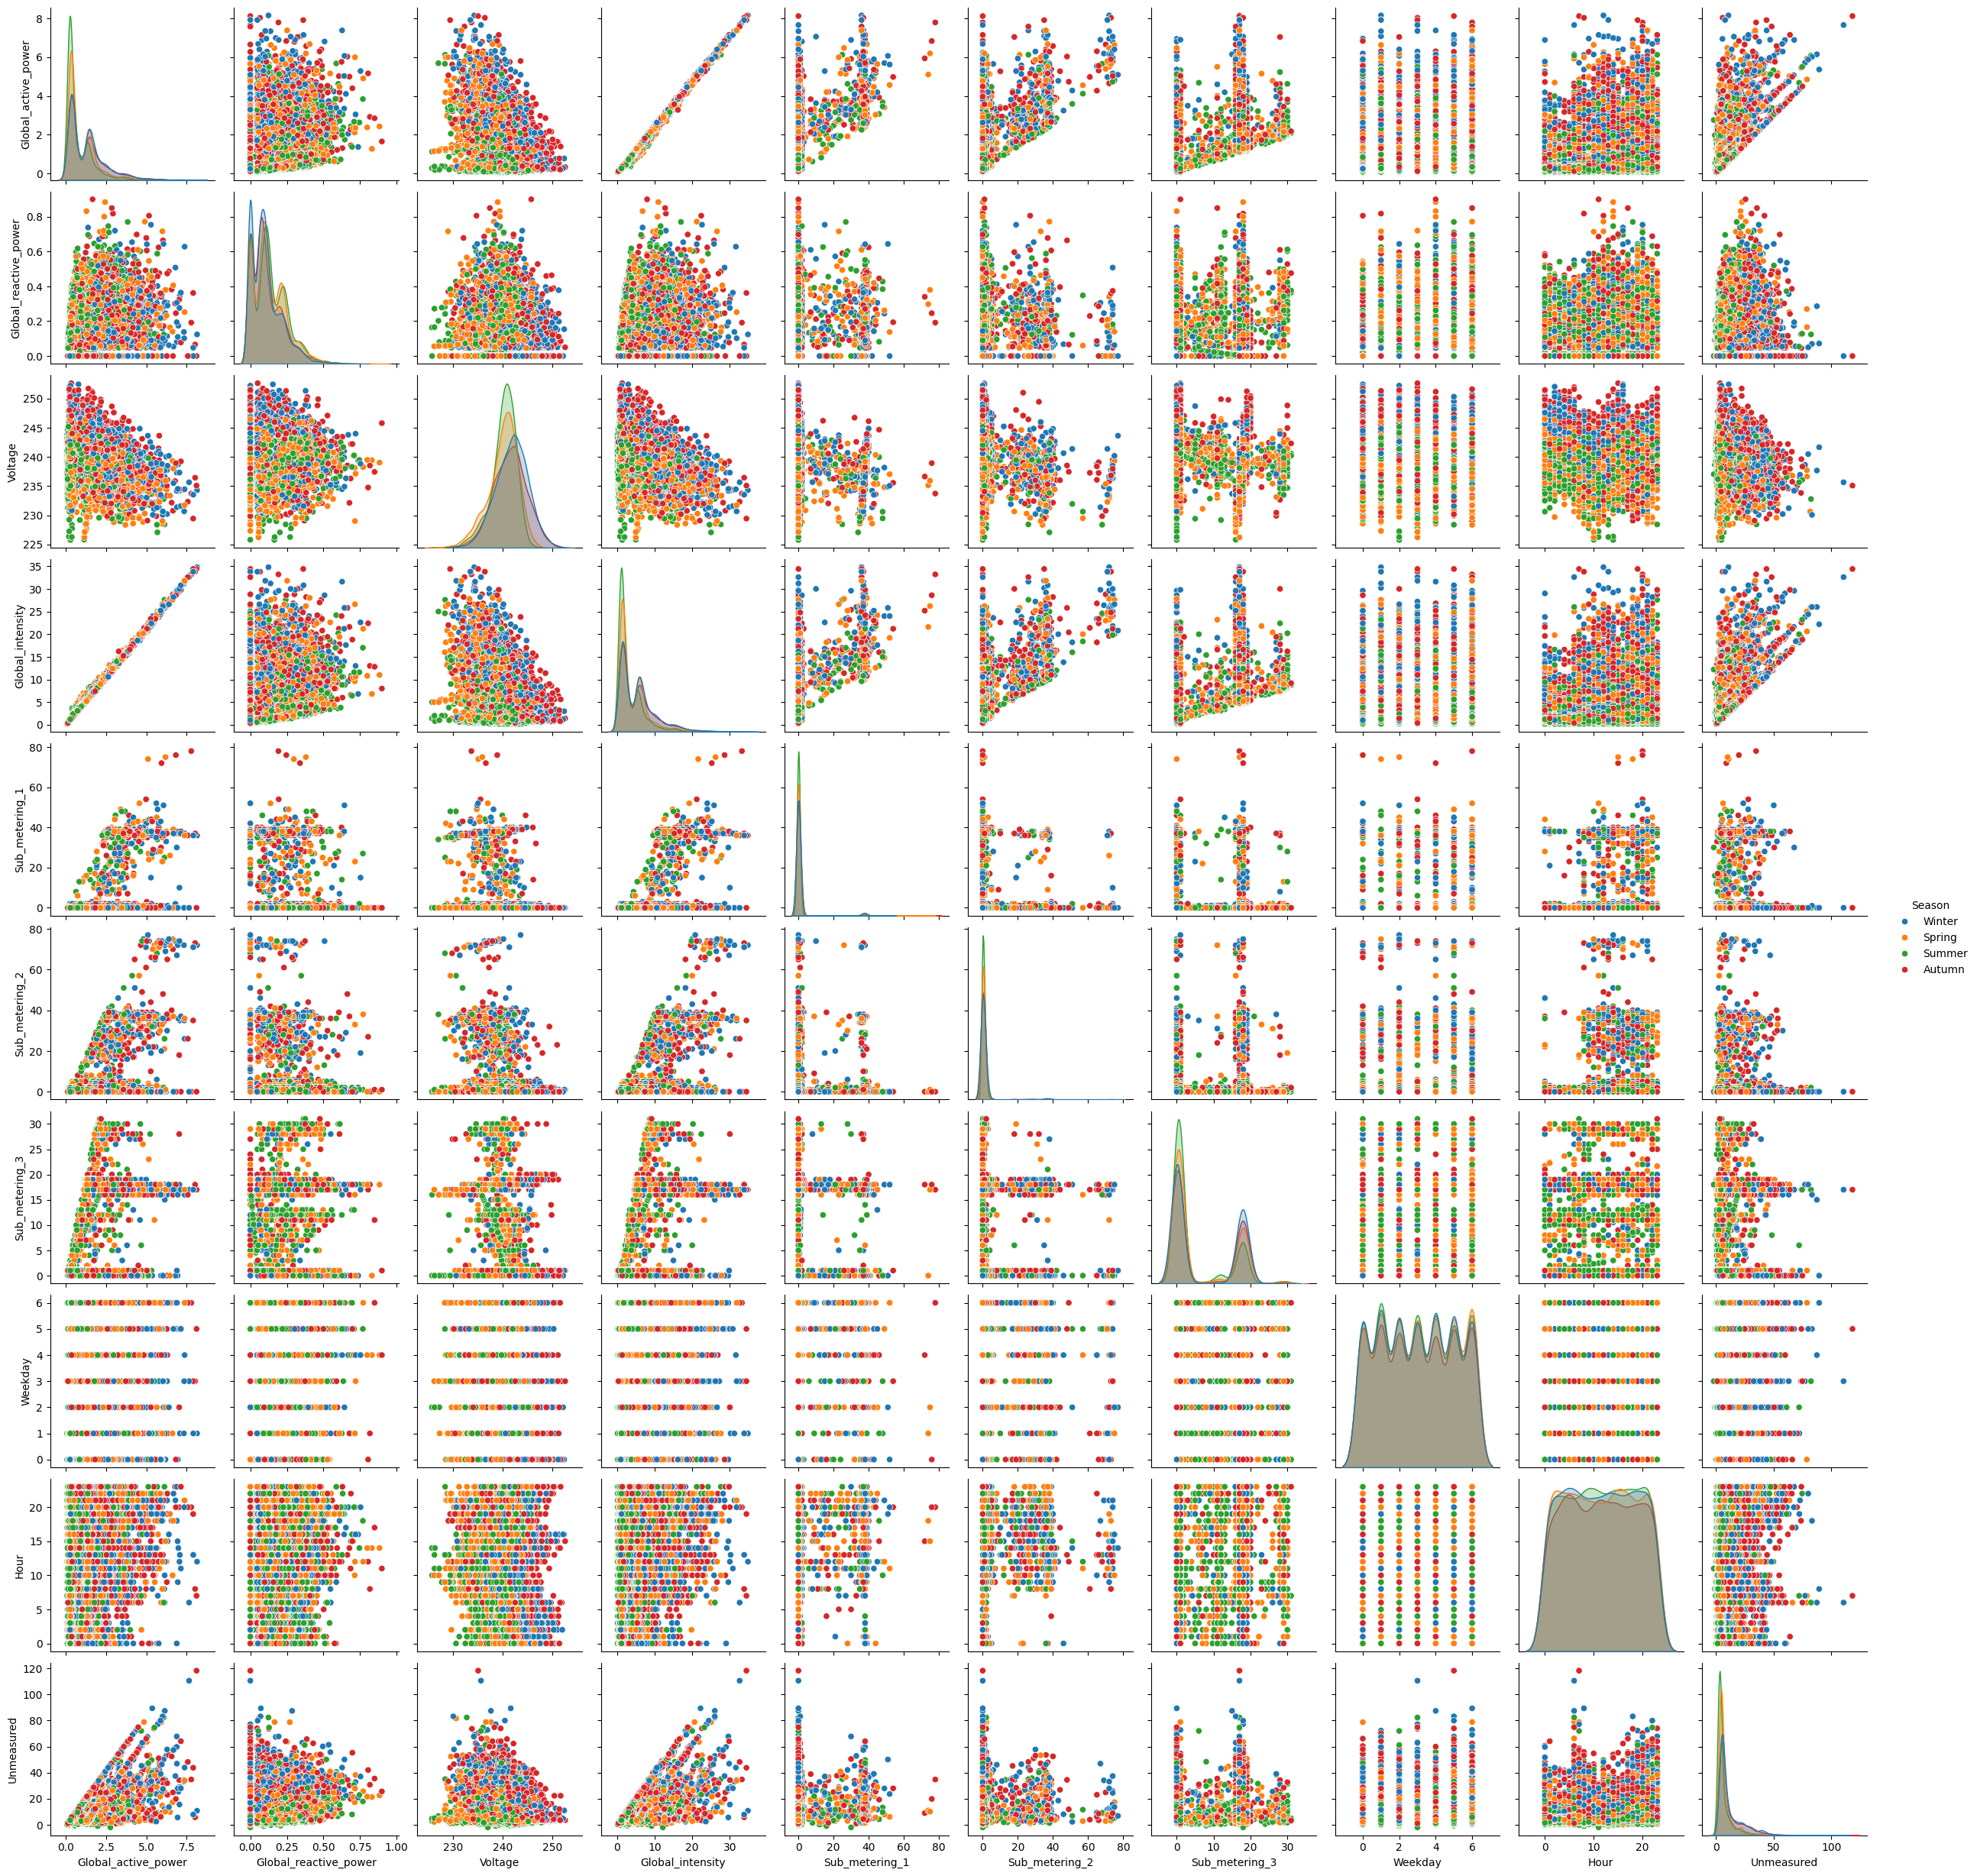

In [ ]:
# pairplot usando season como hue e excluindo as colunas Date e Daytime
sns.pairplot(df.drop(['Date', 'Daytime'], axis=1).sample(20000), hue='Season');
# sns.pairplot(df.drop(['Date','Daytime'], axis=1), hue='Season', height = 2.5);

O Gráfico acima apresenta alguns insights com relação ao consumo de energia elétrica na residência na pequena mostra selecionada:
- as medições realizadas no inverno estão representadas pela cor azul e nas medições da coluna sub_metering_3 (Climatização) da pra perceber que os picos maiores de baixa carga são verdes (Verão) e os maiores de carga maior são azuis. indicando que no inverno há a preponderancia da climatização com o aquecedor.
-

Para avaliar se os padrões de consumo se modificam durante o dia, será repetido o gráfico de pairplot para os periodos do dia

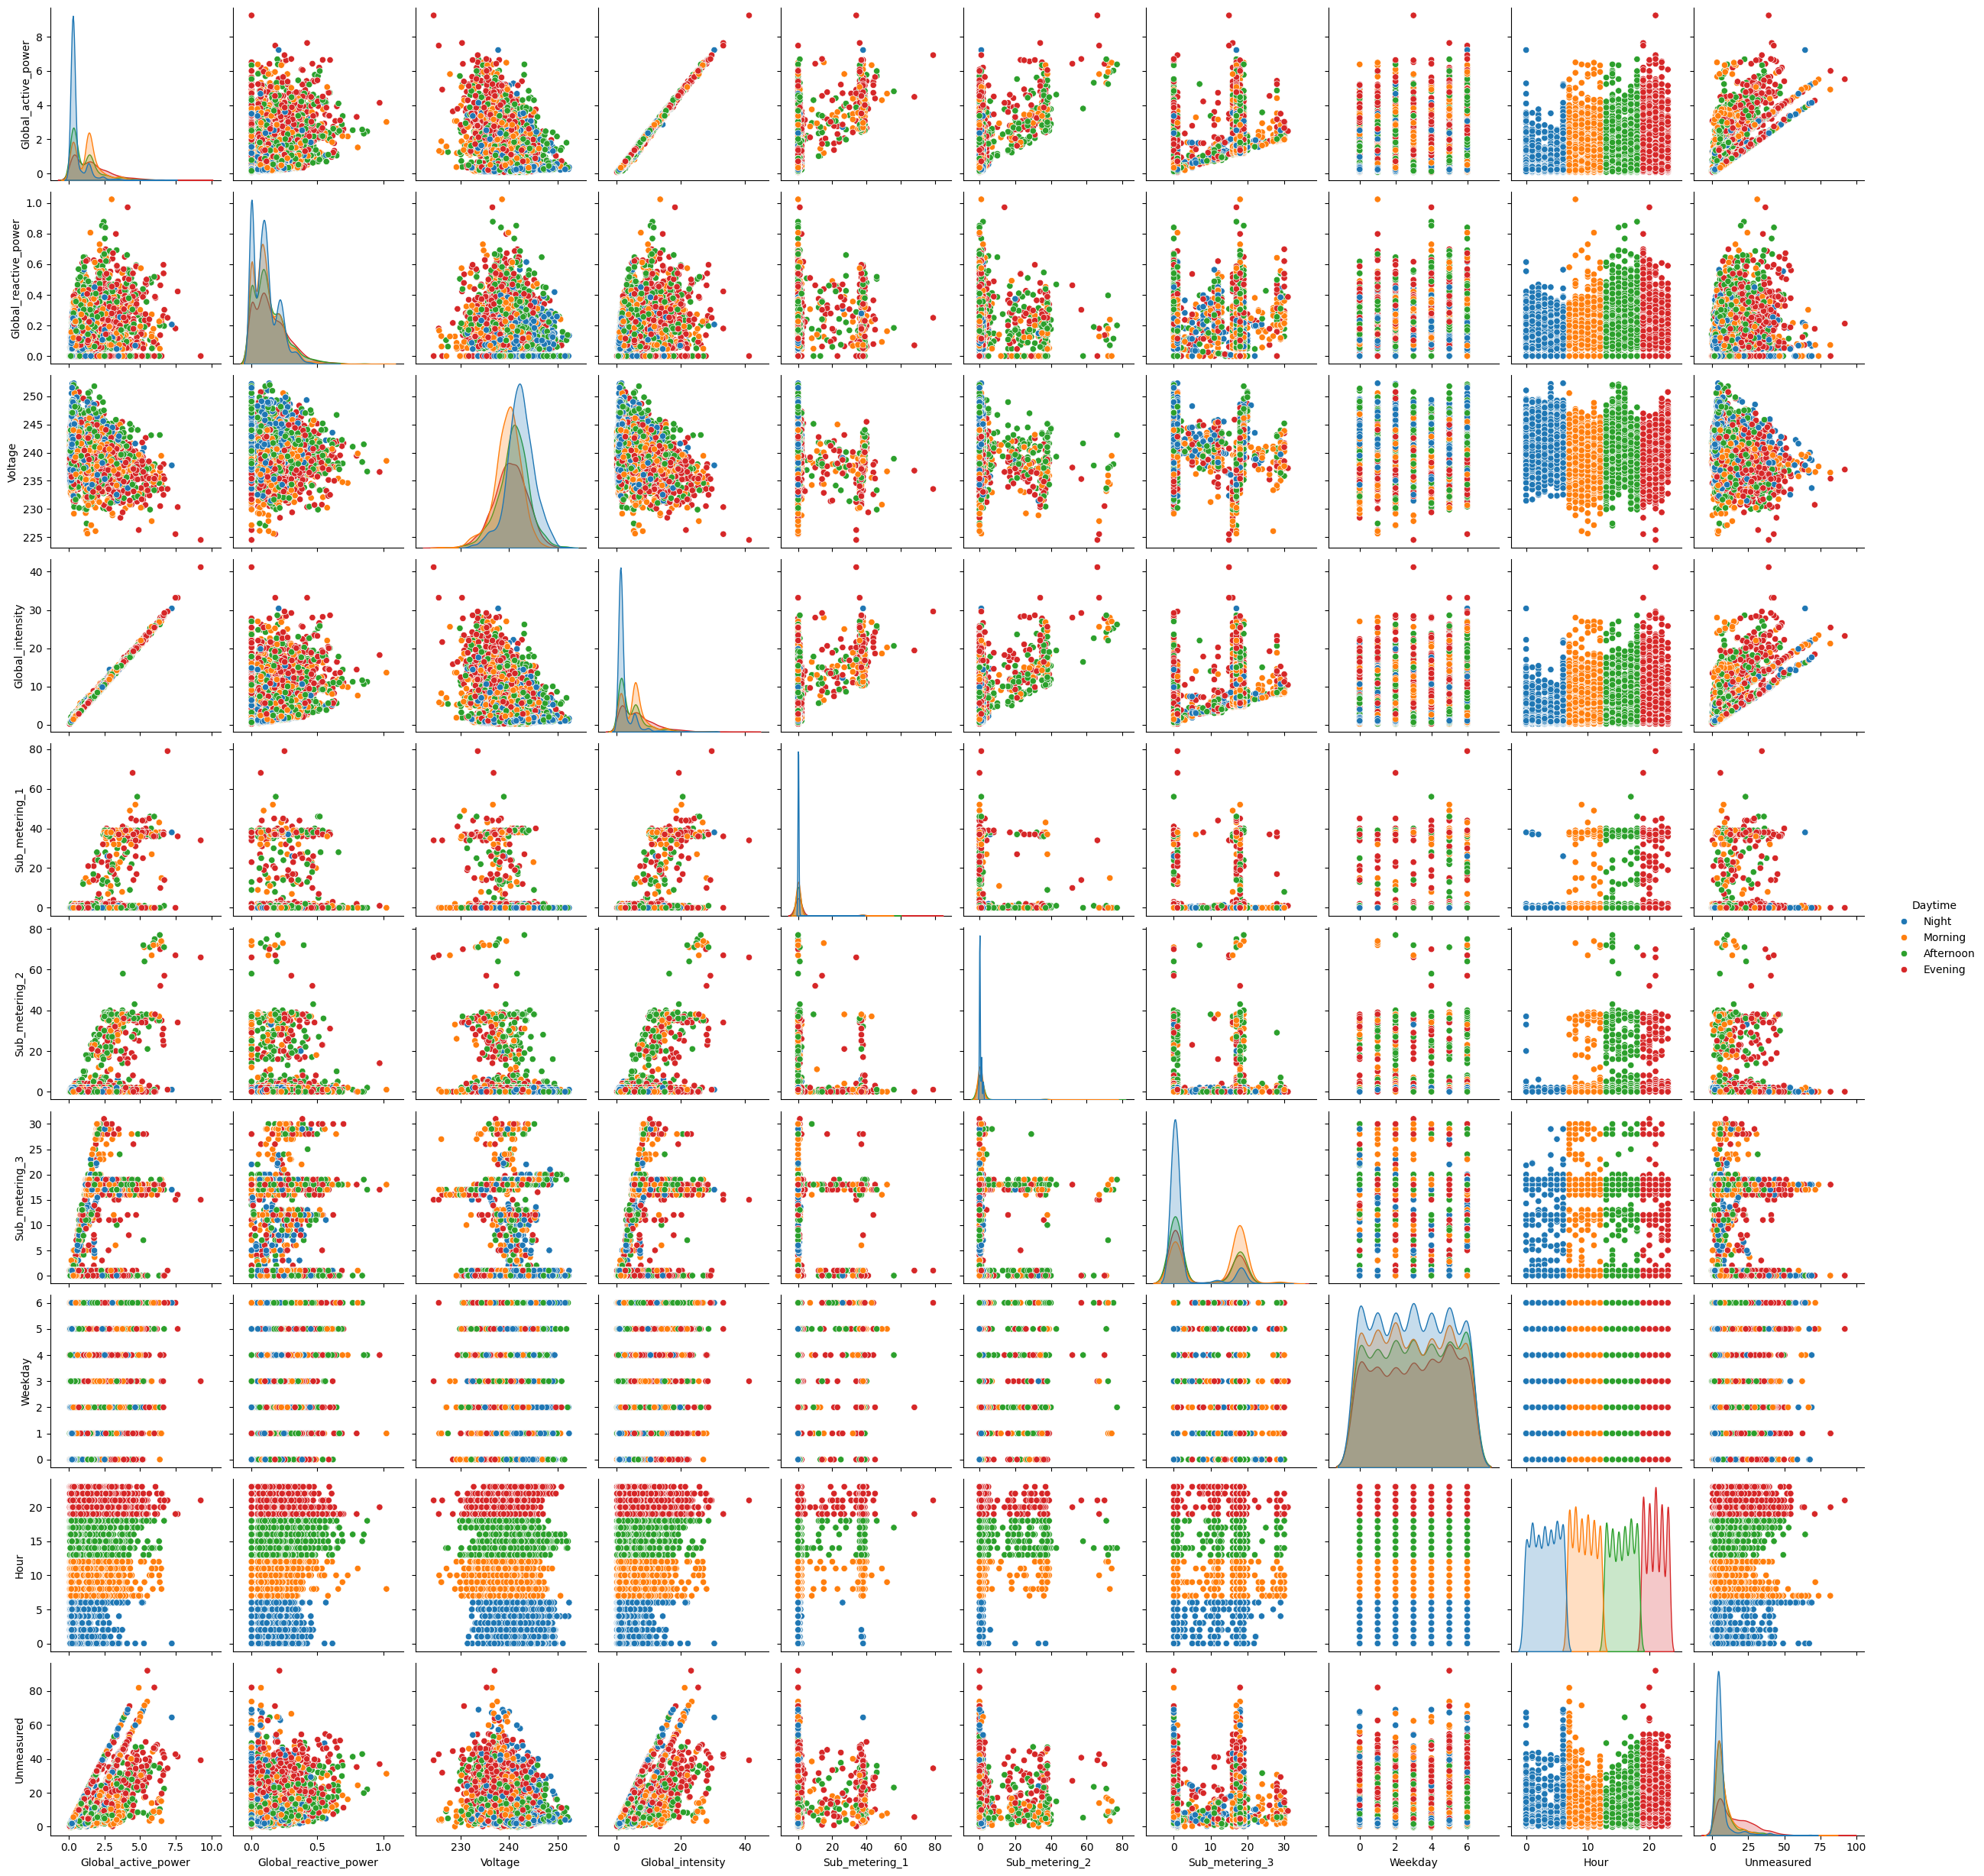

In [ ]:
# pairplot usando season como hue e excluindo as colunas Date e Daytime
sns.pairplot(df.drop(['Date', 'Season'], axis=1).sample(10000), hue='Daytime');

Nesta amostra podemos perceber algumas caracteristicas interessantes:
- avaliando o dia da semana com relação à medida do consumo global, podemos perceber que durante a semana (dia de 0 a 4) o consumo é maior à noite (pontos vermelhos) e nos finais de semana (dias 5 e 6) começa a aparecer mais pontos verdes (consumo à tarde).
- sub_metering_2 (Lavanderia) tem valores maiores em laranja (manhã) e verde (tarde) durante os dias de semana e no final de semana o consumo é variado.

## 4. Conclusões

O dataset escolhido é muito rico e permite uma análise muito interessante. Ainda há muito trabalho a ser feito para entender melhor os padrões de consumo da casa em questão, mas o entendimento obtido com a exploração inicial dos dados pode orientar a criação de um modelo de previsão de consumo de energia elétrica.

A meta de entender alguns padrões de consumo da residência foi atingida. algumas consclusões interessantes foram obtidas, como a correlação entre o consumo de energia e a corrente elétrica e a correlação inversa entre o consumo e a tensão elétrica, os padrões de uso nas diferentes estações do ano e nos diferentes períodos do dia e a correlação entre o consumo e o uso de equipamentos de climatização.

Acredito que este MVP possa evoluir mais com uma maior exploração usando os campos gerados a partir dos dados e com a utilização de outras técnicas de visualização de dados não utilizadas nesta versão. Com certeza será usado como ponto de partida para outros projetos.

O fato de já ter feito a Sprint II e realizado a construção de um modelo sem o conhecimento adicional obtido nessa etapa me faz perceber que é essencial este conhecimento para uma melhor evolução dos modelos de machine learning e deep learning.

